<a href="https://colab.research.google.com/github/AbdKhuffash/Predict-Blod-Donations/blob/main/predictblooddonations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names")


# Reading Data

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/AI/transfusion.data"
dataset=pd.read_csv(path)
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Cleaning Dataset:

In [ ]:
dataset.dropna(inplace=True)

More Information About Data:

In [ ]:
dataset.describe().round(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.00,748.00,748.00,748.00,748.00
mean,9.51,5.51,1378.68,34.28,0.24
std,8.10,5.84,1459.83,24.38,0.43
min,0.00,1.00,250.00,2.00,0.00
25%,2.75,2.00,500.00,16.00,0.00
50%,7.00,4.00,1000.00,28.00,0.00
75%,14.00,7.00,1750.00,50.00,0.00
max,74.00,50.00,12500.00,98.00,1.00


# Proccessing Data

Changing the Last colomn (whether he/she donated blood in March 2007) name to Prediction/Goal, and dropping it.

In [ ]:
dataset.rename(columns={'whether he/she donated blood in March 2007': 'goal'},inplace=True)
x= dataset.drop(columns='goal')
x.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [ ]:
y= dataset['goal']
y.value_counts()

0    570
1    178
Name: goal, dtype: int64

The (train_test_split) function from the (sklearn) library was utilized to divide the dataset into a training set and a testing set. The division was made such that 20% of the dataset was allocated as the testing set, while the remaining 80% constituted the training set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.2,random_state= 1,stratify=y)


30% is a testing set, 70% is  training set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.3,random_state= 1,stratify=y)


25% is a testing set, 75% is  training set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.25,random_state= 1,stratify=y)

**Ploting the data:**

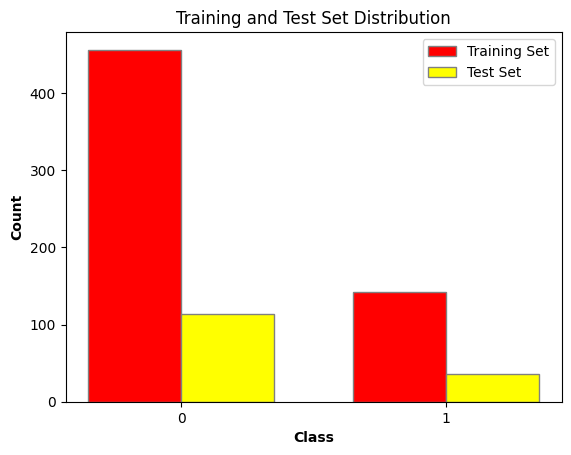

In [ ]:
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(train_counts))
r2 = [x + barWidth for x in r1]

ax.bar(r1, train_counts, color='red', width=barWidth, edgecolor='grey', label='Training Set')
ax.bar(r2, test_counts, color='yellow', width=barWidth, edgecolor='grey', label='Test Set')

plt.xlabel('Class', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(train_counts))], train_counts.index)

plt.legend()
plt.title('Training and Test Set Distribution')
plt.show()

Scaler is used to normalize the feature set to ensure that each feature contributes equally to the distance calculations and optimization algorithms, potentially improving the performance and speed of the machine learning models. However, the choice of scaler also depends on the specific characteristics of the dataset and the requirements of the machine learning model being used.

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Model Algorithms

**Decisicion Tree:**

In [ ]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(x_train, y_train)
y_pred_DT = DT_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_DT)
report = classification_report(y_test, y_pred_DT)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Accuracy: 0.7133333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       114
           1       0.39      0.33      0.36        36

    accuracy                           0.71       150
   macro avg       0.59      0.58      0.59       150
weighted avg       0.70      0.71      0.71       150



GridSearchCV is employed to optimize the hyperparameters of a Decision Tree classifier, a crucial step for enhancing model performance. Key parameters like max_depth, min_samples_split, and min_samples_leaf are varied systematically to find the most effective combination, ensuring the model neither overfits nor underfits the data. This process, integral to machine learning, significantly improves the model's accuracy and generalization ability, making it more reliable for predicting unseen data. By using GridSearchCV with cross-validation, the approach also ensures the robustness and reproducibility of the results, making the model's predictions more trustworthy.

In [ ]:
# Define the parameter grid you want to search
param_grid = {

    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

# Create the Decision Tree classifier
DT_model = DecisionTreeClassifier(random_state=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(DT_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (classifier) from the grid search
best_DT_model = grid_search.best_estimator_

# Print the best hyperparameters and the best estimator
print("Best Hyperparameters:")
print(best_params)
print("\nBest Estimator:")
print(best_DT_model)

# Use the best estimator to make predictions
best_y_pred_DT = best_DT_model.predict(x_test)

# Calculate accuracy and classification report for the best estimator
accuracy_best = accuracy_score(y_test, best_y_pred_DT)
report_best = classification_report(y_test, best_y_pred_DT)

# Print the accuracy and classification report for the best estimator
print(f"\nAccuracy with Best Estimator: {accuracy_best}\n")
print(f"Classification Report with Best Estimator:\n{report_best}")


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Estimator:
DecisionTreeClassifier(min_samples_leaf=4, random_state=1)

Accuracy with Best Estimator: 0.7666666666666667

Classification Report with Best Estimator:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       114
           1       0.52      0.31      0.39        36

    accuracy                           0.77       150
   macro avg       0.67      0.61      0.62       150
weighted avg       0.74      0.77      0.74       150



**Nieve Bias:**

In [ ]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

y_pred_NB = NB_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_NB))

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       114
           1       0.50      0.19      0.28        36

    accuracy                           0.76       150
   macro avg       0.64      0.57      0.57       150
weighted avg       0.72      0.76      0.72       150



GridSearchCV is applied to fine-tune the Gaussian Naive Bayes model, a critical step for optimizing its predictive performance. The tuning focuses on the 'var_smoothing' parameter, which is pivotal for the Naive Bayes algorithm as it helps in stabilizing the calculation and handling numerical issues. Due to the limited number of hyperparameters in GaussianNB, the range of 'var_smoothing' values, defined logarithmically, provides a comprehensive exploration of its effects. The grid search, conducted with cross-validation, ensures robustness in the model's evaluation. The optimal configuration is then extracted and used for predictions, with the final model's accuracy and detailed classification report underscoring the significance of this hyperparameter tuning in improving model accuracy and reliability for real-world predictions.

In [ ]:
# Creating the Gaussian Naive Bayes model
NB_model = GaussianNB()

# Parameters grid. Note: GaussianNB doesn't have many hyperparameters to tune.
# Here, we are only tuning 'var_smoothing'
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=NB_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(x_train, y_train)

# Extracting the best estimator
best_model_NB = grid_search.best_estimator_

# Predicting the Test set results
best_y_pred_NB = best_model_NB.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, best_y_pred_NB)
print("Accuracy:", accuracy)

# Print the accuracy and classification report for the best estimator
print(f"\nAccuracy with Best Estimator: {accuracy_best}\n")
print(f"Classification Report with Best Estimator:\n{report_best}")



Accuracy: 0.7666666666666667

Accuracy with Best Estimator: 0.7666666666666667

Classification Report with Best Estimator:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       114
           1       0.52      0.31      0.39        36

    accuracy                           0.77       150
   macro avg       0.67      0.61      0.62       150
weighted avg       0.74      0.77      0.74       150



**Support Vector Classification:**

In [ ]:
SVC_model = SVC(random_state=1)
SVC_model.fit(x_train, y_train)

y_pred_svc = SVC_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       114
           1       0.71      0.14      0.23        36

    accuracy                           0.78       150
   macro avg       0.75      0.56      0.55       150
weighted avg       0.77      0.78      0.72       150



The Support Vector Classifier (SVC) model is optimized using GridSearchCV, a critical procedure to enhance its predictive accuracy. The focus is on tuning two key hyperparameters: 'C', the regularization parameter which controls the trade-off between achieving a low error on the training data and minimizing model complexity, and 'degree', relevant for the polynomial kernel to define the complexity of the decision boundaries. The grid search, performed with 5-fold cross-validation, meticulously explores various combinations of these parameters, ensuring a thorough assessment of the model's performance across different configurations. This approach not only improves the model's ability to generalize to new data but also ensures that the results are robust and reliable. The best performing SVC model, identified through this process, is then used for making predictions, with its accuracy and the detailed classification report providing insights into its effectiveness in classifying the data accurately.

In [ ]:
# Initializing the SVC model
SVC_model = SVC(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'degree': [2, 3, 4]  # Degree for polynomial kernel
}

# Creating the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=SVC_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(x_train, y_train)

# Extracting the best estimator
best_model_SVC = grid_search.best_estimator_

# Making predictions with the best model
best_y_pred_svc_ = best_model_SVC.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, best_y_pred_svc_)
print("Accuracy:", accuracy)

# Generating classification report
print("\nClassification Report:\n", classification_report(y_test, best_y_pred_svc_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 0.7866666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       114
           1       0.59      0.36      0.45        36

    accuracy                           0.79       150
   macro avg       0.71      0.64      0.66       150
weighted avg       0.77      0.79      0.77       150



****Artificial Neural Network****


In [ ]:
#used one hidden layer with 100 neurons, and relu as the activation function
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                    max_iter=300, solver='adam', random_state=1)


mlp.fit(x_train, y_train)


predictions = mlp.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predictions))
#print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.7866666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       114
           1       0.70      0.19      0.30        36

    accuracy                           0.79       150
   macro avg       0.75      0.58      0.59       150
weighted avg       0.77      0.79      0.74       150



To optimize an Artificial Neural Network (ANN) model, we use GridSearchCV, a tool that tests various combinations of the model's settings, such as layer sizes, activation functions, and learning rates. This process involves splitting the data into different parts (3-fold cross-validation) to ensure the model is effective across various data sets. After testing all combinations, GridSearchCV identifies the best one, which is then used for predictions. The performance of this optimized model is evaluated using accuracy, a confusion matrix, and a classification report, ensuring the ANN model is as accurate and reliable as possible for data prediction and classification.

In [ ]:
# Define a parameter grid to search for best parameters for MLP
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Create a GridSearchCV instance with MLPClassifier
best_model_ann = GridSearchCV(MLPClassifier(max_iter=300, random_state=1),
                      parameter_space, n_jobs=-1, cv=3)

# Fit the model
best_model_ann.fit(x_train, y_train)

# Best parameter set
#print('Best parameters found:\n', mlp_gs.best_params_)

# All results
means = best_model_ann.cv_results_['mean_test_score']
stds = best_model_ann.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, best_model_ann.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict on test data with the best parameters
y_pred_best_ann = best_model_ann.predict(x_test)

# Print evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_best_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_best_ann))

0.763 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.766 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.763 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.766 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.763 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.768 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.763 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.768 (+/-0.009) for {'activation': 'tanh'

# Comparison Between Models

this function creates a heatmap that can be used to quickly visualize the accuracy of a classifier, showing how many predictions were correct (along the diagonal) and how many were errors (off the diagonal). It is a useful tool for understanding the performance of each classification model.

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Plotting confusion matrices for each model:

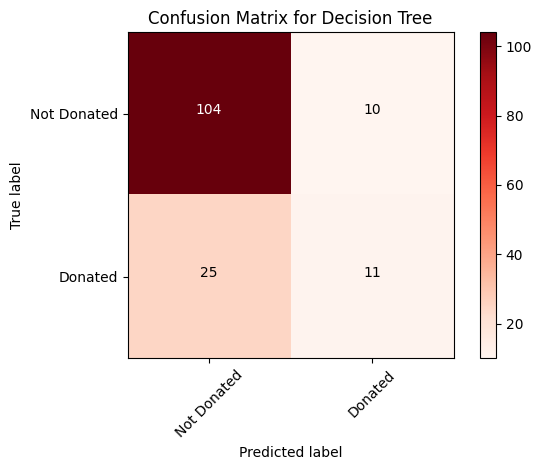

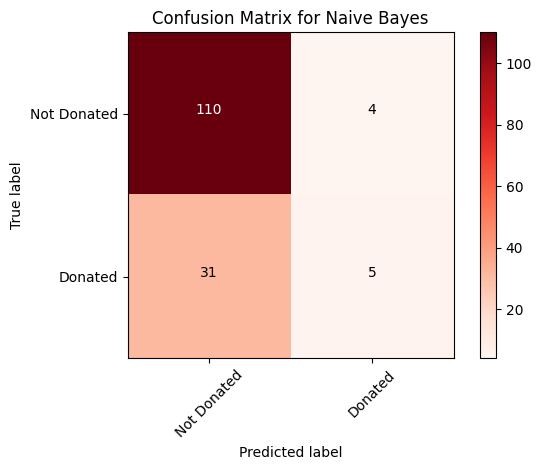

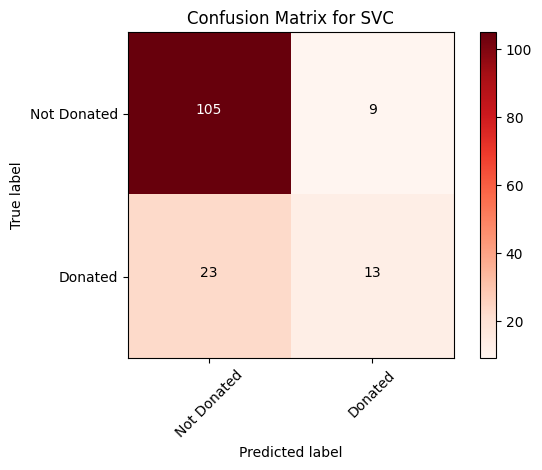

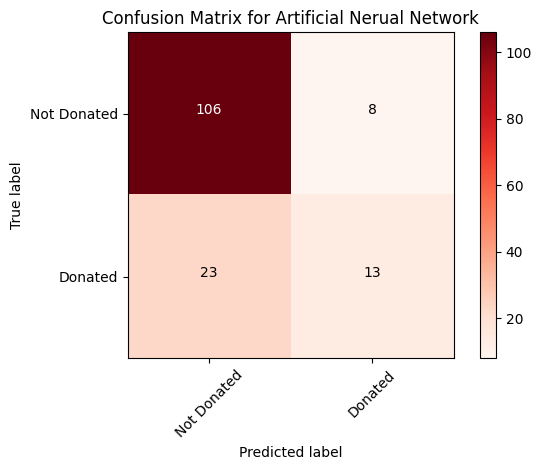

In [ ]:
models = [best_DT_model, best_model_NB, best_model_SVC,best_model_ann]
model_names = ["Decision Tree", "Naive Bayes", "SVC","Artificial Nerual Network"]
y_preds = [best_y_pred_DT, best_y_pred_NB, best_y_pred_svc_,y_pred_best_ann]

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, y_preds[i])
    plt.figure()
    plot_confusion_matrix(cm, classes=['Not Donated', 'Donated'], title=f'Confusion Matrix for {model_names[i]}')


Ploting ROC curve:

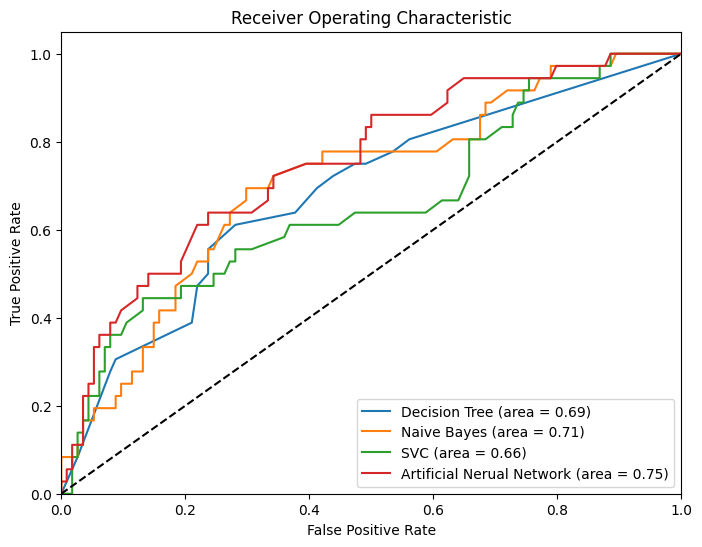

In [ ]:
plt.figure(figsize=(8, 6))

for i, model in enumerate(models):
    # Get the prediction scores
    y_scores = model.predict_proba(x_test)[:, 1] if model_names[i] != "SVC" else model.decision_function(x_test)

    # Calculate TPR and FPR
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



**Comparation-evaluation**

In [ ]:
comparisons = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
for i, model in enumerate(models):
    comparisons = comparisons.append({
        "Model": model_names[i],
        "Accuracy": accuracy_score(y_test, y_preds[i]),
        "Precision": precision_score(y_test, y_preds[i]),
        "Recall": recall_score(y_test, y_preds[i]),
        "F1-Score": f1_score(y_test, y_preds[i])
    }, ignore_index=True)

print(comparisons)

                       Model  Accuracy  Precision    Recall  F1-Score
0              Decision Tree  0.766667   0.523810  0.305556  0.385965
1                Naive Bayes  0.766667   0.555556  0.138889  0.222222
2                        SVC  0.786667   0.590909  0.361111  0.448276
3  Artificial Nerual Network  0.793333   0.619048  0.361111  0.456140


In [ ]:
def plot_model_accuracies(df, title='Model Accuracies'):
    colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

    fig, ax = plt.subplots()
    y_pos = np.arange(len(df))
    bars = ax.barh(y_pos, df["Accuracy"], align='center', color=colors, ecolor='black')

    for bar, model in zip(bars, df["Model"]):
        bar.set_label(model)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["Model"])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Accuracy')
    ax.set_title(title)
    #ax.legend()
    #plt.legend(loc="lower right")
    plt.tight_layout()

    return fig, ax



**Plotting Model Accuracies**

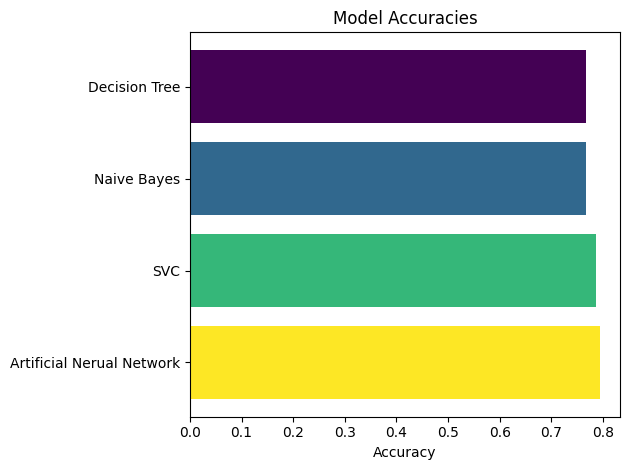

In [ ]:
fig, ax = plot_model_accuracies(comparisons)

# Data Entry

In [ ]:
column_names = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

user_data = []
for column in column_names:
    user_input = input(f'Enter {column}: ')
    user_data.append(float(user_input))

user_input_scaled = scaler.transform(np.array([user_data]))
actual = int(input("Actual value (0/1):"))
models = [best_DT_model, best_model_NB, best_model_SVC, best_model_ann]
model_names = ["Decision Tree", "Naive Bayes", "SVC", "Artificial Neural Network"]

print("\n\n\nPredictions:")
for model, name in zip(models, model_names):
    if name in ["SVC", "Artificial Neural Network"]:
        prediction = model.predict(user_input_scaled)
    else:
        prediction_prob = model.predict_proba(user_input_scaled)[0][1]
        prediction = (prediction_prob >= 0.5).astype(int)

    print(f"{name}: {'Can Donate' if prediction else 'Cannot Donate'}")

    # Compare prediction with actual value
    if prediction == actual:
        print(f"{name} prediction matches actual value.")
    else:
        print(f"{name} prediction does not match actual value.")


Enter Recency (months): 11
Enter Frequency (times): 7
Enter Monetary (c.c. blood): 3000
Enter Time (months): 100
Actual value (0/1):1



Predictions:
Decision Tree: Can Donate
Decision Tree prediction matches actual value.
Naive Bayes: Cannot Donate
Naive Bayes prediction does not match actual value.
SVC: Cannot Donate
SVC prediction does not match actual value.
Artificial Neural Network: Cannot Donate
Artificial Neural Network prediction does not match actual value.
